<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/titanic_ver_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeongneopzi","key":"414dfe513ba5e8a72f586027365c5089"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 50.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.08MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.0MB/s]


# 타이타닉 모델링

1. 들어가기 

2. 데이터 불러오기 

3. 특성분석

4. 빈칸채우기

5. feature engineering

6. 모델링


# 들어가기

### 타이타닉????

RMS 타이타닉(통용: RMS 타이타닉, 영어: RMS Titanic)은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선이다. 

1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다. 

타이타닉의 침몰로 1,514명이 사망하였으며, 이는 평화시 해난 사고 가운데 가장 큰 인명피해이다.

RMS 타이타닉은 첫 항해 당시 세계에서 가장 큰 배 가운데 하나였다.

 화이트 스타 라인 사는 RMS 올림픽을 시작으로 세 척의 올림픽급 여객선을 운용하였으며, RMS 타이타닉 역시 그 가운데 하나였다.
 
  RMS 타이타닉은 벨파스트에 있는 해럴드 앤 울프 사가 1909년 건조를 시작하여 1911년 5월 31일 진수하였다.

첫 항해에 오른 승객은 다양했으며 이 가운데에는 매우 부유한 사람들도 있었다. 

대다수는 영국과 스칸다나비아 반도 등에서 새로운 삶을 찾아 미국으로 가는 이민자들이었다. 출항 당시 승선 인원은 2,223 명이었다.

타이타닉호는 선내에 체육관과 수영장, 그외 호화로운 부대시설을 갖추고 있었다.

그런데 느슨한 규제 때문에 구명정은 20척 밖에 없었다. 구명정의 정원은 1,178명이었다. 1912년 4월 14일 오후 11시 40분(선내 시각, GMT -3)빙산과 충돌하였고 이 때문에 주갑판이 함몰되면서 우현에 구멍이 났다.

 구멍으로 물이 들어오기 시작한 지 2시간 40분만에 완전히 침수되어 침몰하였다. 
 
 타이타닉호는 방수용 격벽이 설계되어 있었고 문들도 물을 차단할 수 있도록 설계되었으나 실제 사고에선 역부족이었다.
 
  구명정에 타지 못한 채 바다로 뛰어든 수많은 사람들은 수 분 내에 저체온증으로 사망하였다.
  
   침몰할 당시까지도 배에는 1000여명의 사람들이 남아 있었다. 구명정을 타고 있다가 몇 시간 뒤에 RMS 카르파티아에 의해 구조된 사람은 706명에 불과하였다.

# 라이브러리 import + 데이터 불러오기

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')



In [0]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
IDtest = test["PassengerId"]

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Feature 설명

survived : 생존=1, 죽음=0

pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3

sibsp : 함께 탑승한 형제 또는 배우자 수

parch : 함께 탑승한 부모 또는 자녀 수

ticket : 티켓 번호

cabin : 선실 번호

Fare : 요금

embarked : 탑승장소 S=Southhampton, C=Cherbourg, 
Q=Queenstown

1등급의 가격은 3등급의 10배 

no value끼리 연관성을 파악해서 데이터 끼리의 연관성을 검증할것

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터 특성 분석 및 결측값 찾기 

##결측치와 이상치 처리

결측치 비율에 따른 변수 제거

결측치가 10%이하인 경우 : 해당 표본을 제거하거나 imputation
결측치가 20%이상인 경우 : 해당 변수 제거 or imputation
데이터량 확인

통상적으로 변수 수의 최소 3배 이상이 되어야 한다.
데이터량이 충분히 확보될 수 있도록 기준 기간을 산정하여야 한다.

##이상치 

변수의 분포에서 비정상적으로 벗어난 값. 

## 이상치 판정 방법론

Box-plot : (제3분위수 - 제1분위수) *1.5 + (제1분위수) < x 이거나 제3분위수 - 제1분위수) *1.5 + (제3분위수) > x이면 이상치

3-sigma : 일변량 자료들 중 평균 ± 3*표준편차를 벗어나는 것들을 비정상이라 규정(정규분포 기반)

## 이상치 처리 방법

제거 : 자료가 많지 않은 경우 권장하지 않음

대체 : 자료의 하한 또는 상한값으로 대체

In [0]:
#위에 적힌 그대로 코드화 시키자 
def detect_outliers(df,n,features):
    
    outlier_list = []
    
    
    for col in features:
        # 25% 1분위수찾기
        Q1 = np.percentile(df[col], 25)

        # 75% 3분위수 찾기
        Q3 = np.percentile(df[col],75)

        # 두개 빼기 이걸 IQR이라고 부름
        IQR = Q3 - Q1
        
        # 이상치 범위
        outlier_step = 1.5 * IQR
        
        # 그 안에 포함되는지 아니면 벗어나는지 찾기
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # 집어넣기
        outlier_list.extend(outlier_list_col)
        
   
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    return multiple_outliers   


Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])


In [10]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


10명은 잘라 내야 됨 

인덱스 27 88 341은 표값이 너무 높음 

나머지는 함꼐 탑승한 가족이 너무 많음 

In [0]:
#잘라

train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

이상치 잘랐으니까 이제 두개 합치기

In [12]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [13]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


전체 데이터를 구했고 인덱스도 알고 

빈칸이 얼마나 있는지 알아야 됨

In [14]:
dataset = dataset.fillna(np.nan)

dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


#특성분석

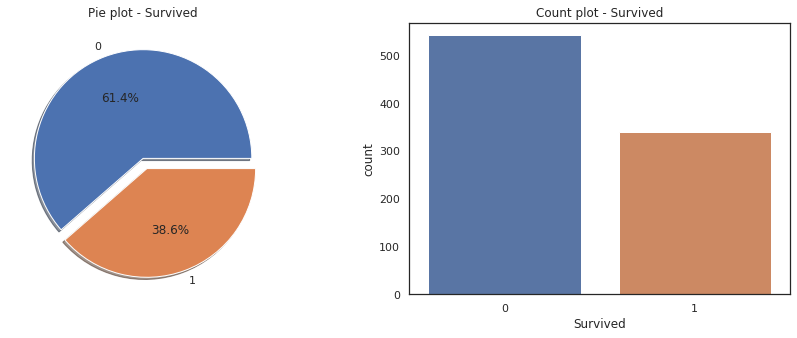

In [17]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

타켓 라벨이 어떤 분포를 띄고 있냐를 확인할 필요가 있음 

타이타닉 같은 bunary형태로 살았다 죽었다를 판단하는 기준에 있어서는 분포에 따라서 모델의 평가 방법이 달라짐 

결과를 보면 산사람은 38.4% 고 죽은 사람이 61프로임 
해당 라벨은 상당히 균일한 분포를 띄고 있음 

만약에 데이터에 다 죽고 1명만 살아서 99.9% 사망이라면 
볼것도 없이 모델이 전부 죽는다는 모델을 만들면 정확도가 99%임 예측할 필요도 없음 

그런의미에서 균일한 분포를 갖는다는것은 굉장히 중요

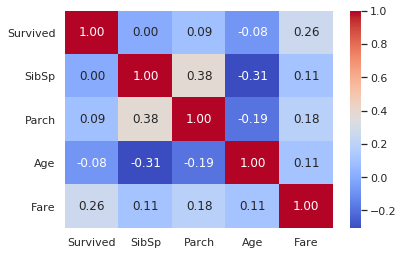

In [18]:
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

숫자 값들 중에서 Fare 만 유일하게 생존이랑 연결 되어 있음 

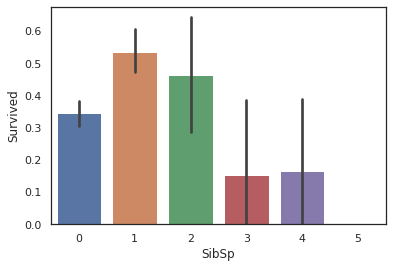

In [19]:
g = sns.barplot(x="SibSp",y="Survived",data=train)

어렷이서 오면 생존할 확률이 적음

0은 혼자 온거고 1은 둘이 온건데 

이렇게 작은 인원이 모여있는 경우에 더 높은 생존률을 보이는 것으로 보아서 

이것은 생존에 유의미한 데이터 임

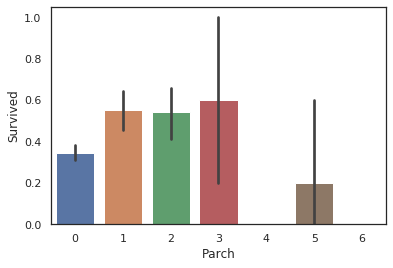

In [20]:
g = sns.barplot(x="Parch",y="Survived",data=train)

소가족이 더 잘 살아 남음 

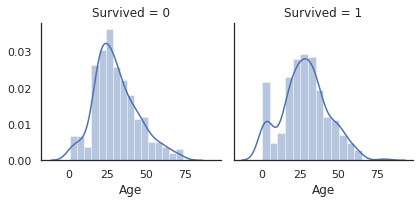

In [21]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

연령과 생존은 상관관계가 있음 

고령일수록 살 확률이 낮고 

나이가 젊을수록 더 잘 살아 남을 확률이 높음 

아주 어리면 더 잘 살아 남음 

분포가 안정적임 

In [22]:
dataset["Fare"].isnull().sum()

1

In [0]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

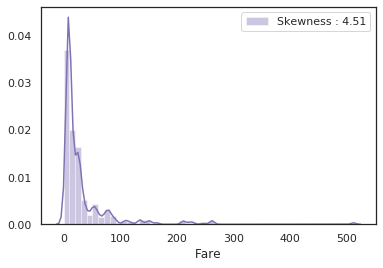

In [24]:
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

가격 꼴랑 하나 빈거 그냥 평균으로 채우고 

나중에 문제 되면 티켓등급 보고 그 평균으로 다시 채울거임 

일단 왜도 첨도를 분석해 보면 넓은 바운더리에 길게 분포되어 있음 

이거 로그 씌워서 각 데이터가 미치는 영향을 줄여야 함 



In [0]:
dataset['Fare'] = np.log1p(dataset['Fare'])

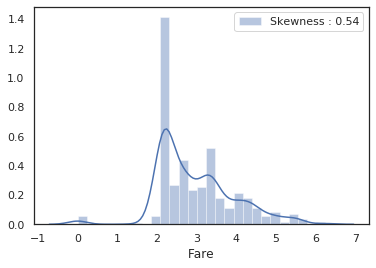

In [26]:
g = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

훨씬 좋아짐

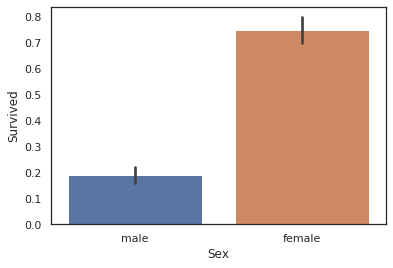

In [27]:
g = sns.barplot(x="Sex",y="Survived",data=train)

여자가 더 잘 살아 남음

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


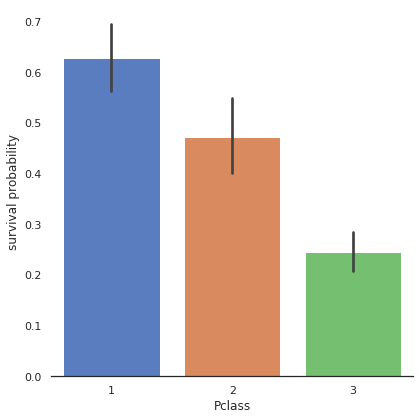

In [28]:
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

1등석일수록 더 잘살아 남음 


In [29]:
df = train[train['Pclass']==1]
df = df[df['Sex']=='male']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************1등급 남자')
df = train[train['Pclass']==1]
df = df[df['Sex']=='female']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************1등급 여자')
df = train[train['Pclass']==2]
df = df[df['Sex']=='male']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************2등급 남자')
df = train[train['Pclass']==2]
df = df[df['Sex']=='female']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************2등급 여자')
df = train[train['Pclass']==3]
df = df[df['Sex']=='male']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************3등급 남자')
df = train[train['Pclass']==3]
df = df[df['Sex']=='female']
print(df.shape)
print(df['Survived'].value_counts())
print('**********************************************************3등급 여자')

(121, 12)
0    76
1    45
Name: Survived, dtype: int64
**********************************************************1등급 남자
(92, 12)
1    89
0     3
Name: Survived, dtype: int64
**********************************************************1등급 여자
(108, 12)
0    91
1    17
Name: Survived, dtype: int64
**********************************************************2등급 남자
(76, 12)
1    70
0     6
Name: Survived, dtype: int64
**********************************************************2등급 여자
(343, 12)
0    296
1     47
Name: Survived, dtype: int64
**********************************************************3등급 남자
(141, 12)
1    72
0    69
Name: Survived, dtype: int64
**********************************************************3등급 여자


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


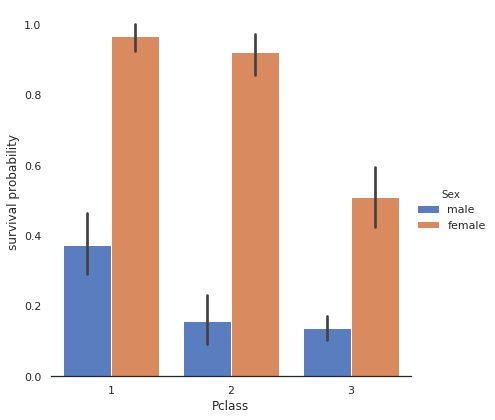

In [30]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

1등석 여자 일수록 더 잘 살아 남고 

등급이 떨어질수록 생존확률은 낮음 

일단 부자 여자는 확실히 잘 살아 남음

In [31]:
dataset["Embarked"].isnull().sum()

2

In [0]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [33]:
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


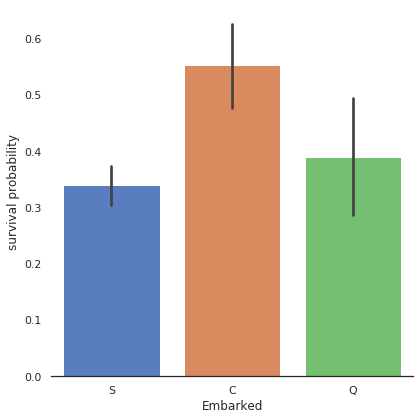

In [34]:
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

C에서 탄 사람이 더 잘 살아 남음

이건 C에서 탄 사람들중 여자가 많다는 것이 거나 1등석이 많다는 것을 의미 할수 있음 

C라면 변수가 높은데에는 여자거나 부자거나 나이가 젊거나 하는 많은 변수들이 혼재 되어 있을수 있음

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


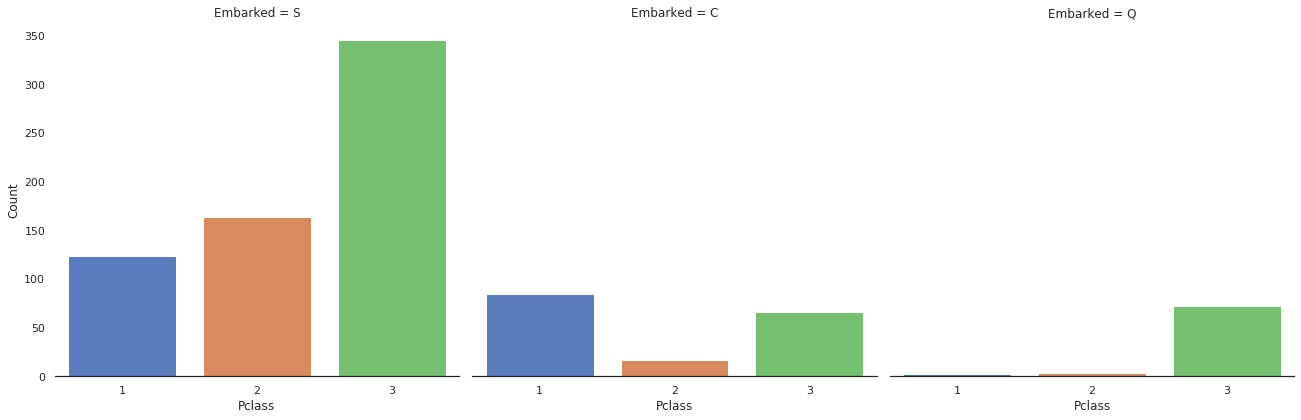

In [35]:
g = sns.factorplot("Pclass", col="Embarked",  data=train,
                   size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

실제로 3등석이 S와 Q가 많은게 눈에 보임

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


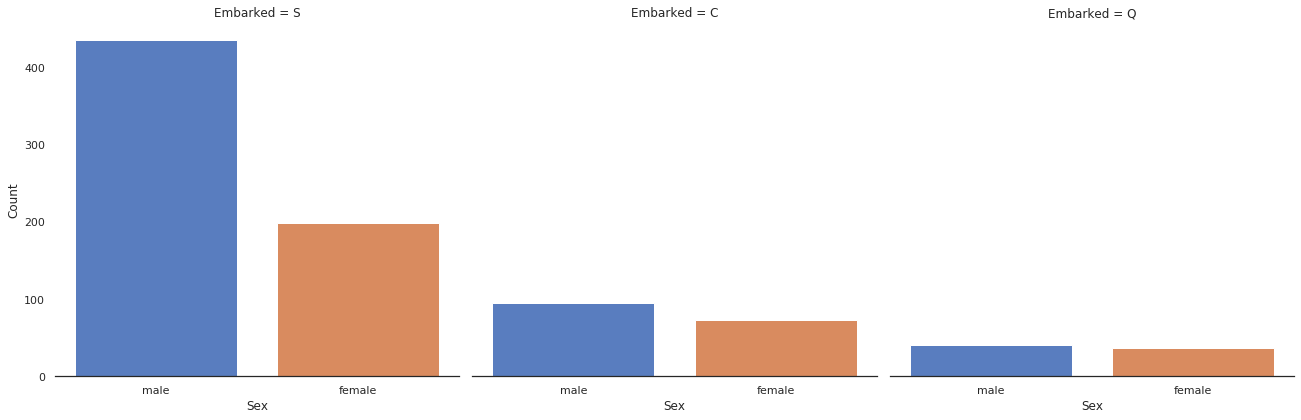

In [36]:
g = sns.factorplot("Sex", col="Embarked",  data=train,
                   size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

S는 3등석 남자 들이 많이 탄거 같음 

# 빈칸 채우기

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


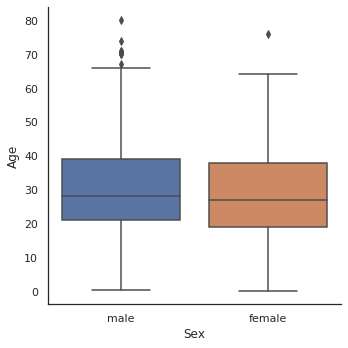

In [37]:
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


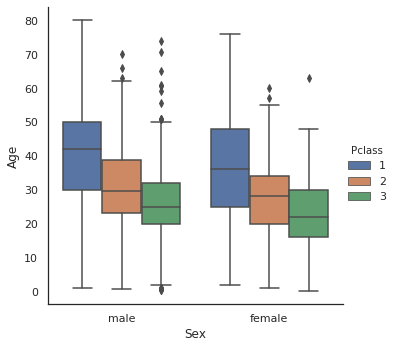

In [38]:
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


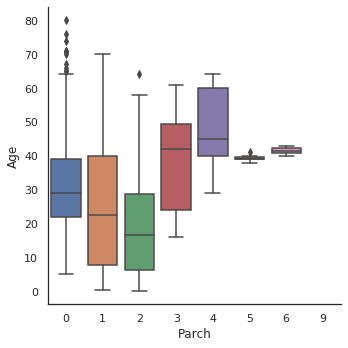

In [39]:
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


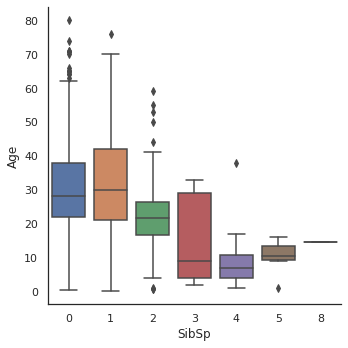

In [40]:
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

성별이 나이를 판가름 해주지는 않는것 같음 

이상적으로는 젊은 여자가 많이 타고 늙은 가난한 남자가 많이 타있으면 지금까지 흐름하고 딱 맞는데 그런건 아닌거 같음 



그런데 1등석 승객은 23등급 보다 나이가 많은게 눈에 보임 

In [0]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

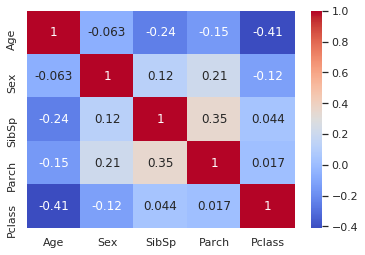

In [42]:
g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="coolwarm",annot=True)

비어있는 나이는 자리와 가족 등과 관련된 유사한 행을 나눠서 보여주는것이 가장 좋음

그 값의 중간 값을 확인하고 그걸로 채우는것도 좋음 


In [43]:
no_Age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in no_Age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
dataset.isnull().sum()

Age               0
Cabin          1007
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

유튜브 댓글 분석 하다 보니까 이름에도 많은 정보가 들어있음 

처음에는 이름 다 떼어냈는데 거기서 성별을 조금더 세부적으로 나눌수 있는 지표가 있음

In [45]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [46]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

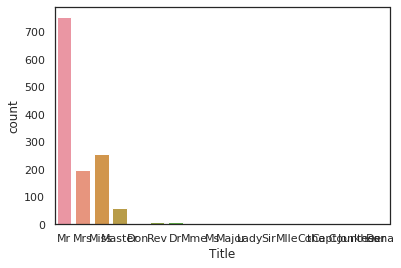

In [47]:
g = sns.countplot(x="Title",data=dataset)

In [0]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

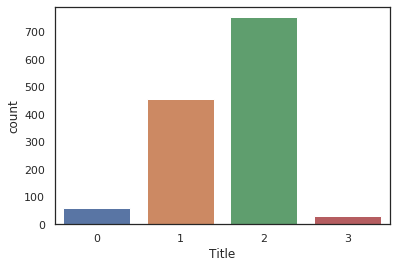

In [49]:
g = sns.countplot(dataset["Title"])

mr가 가장 많음 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


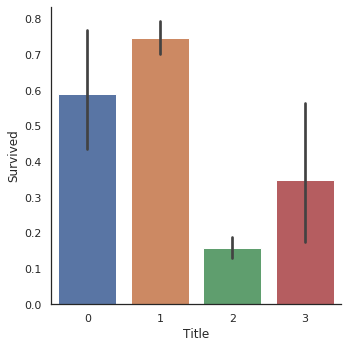

In [50]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")

미스터를 가진 사람들은 다 죽고

여자랑 애들은 살아 남음

##가족 파생변수 생성

In [0]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [0]:
dataset["Family"] = dataset["SibSp"] + dataset["Parch"] + 1

혼자 인 사람은 0이기 때문에 전체 인원 +1 해서

파생변수 생성

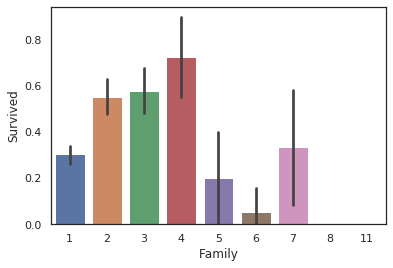

In [53]:
g = sns.barplot(x="Family",y="Survived",data=dataset)

가족규모는 생존에 영향을 미치는게 분명히 있음

 특히나 대가족의 경우에는 살아남기 힘듬 만약 여자고 남자고 간에 family가 8, 11에 속해 있다면 전원 사망이라고 단정 지어도 됨

In [0]:
dataset['Single'] = dataset['Family'].map(lambda s: 1 if s == 1 else 0)
dataset['SFamily'] = dataset['Family'].map(lambda s: 1 if  s == 2  else 0)
dataset['MFamily'] = dataset['Family'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LFamily'] = dataset['Family'].map(lambda s: 1 if s >= 5 else 0)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


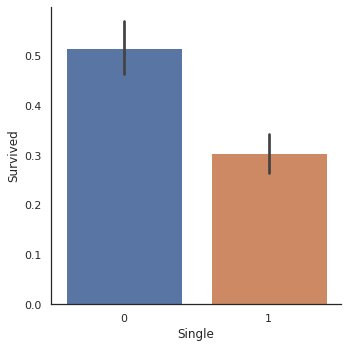

In [55]:
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


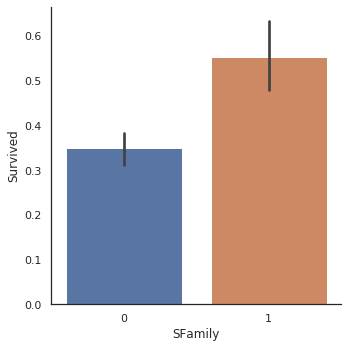

In [56]:
g = sns.factorplot(x="SFamily",y="Survived",data=dataset,kind="bar")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


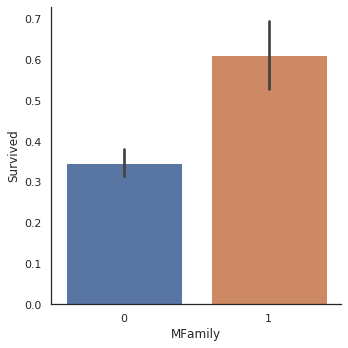

In [57]:
g = sns.factorplot(x="MFamily",y="Survived",data=dataset,kind="bar")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


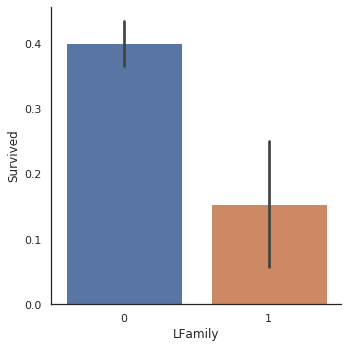

In [58]:
g = sns.factorplot(x="LFamily",y="Survived",data=dataset,kind="bar")

여러개의 피쳐들중에 많이 살아 남은 사람들을 모아서 하나로 묶어줬음 

그러자 결과적으로 큰 대가족의 경우에는 사망률이 높은게 정설로 드러남

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 17 columns):
Age            1299 non-null float64
Cabin          292 non-null object
Embarked       1299 non-null object
Fare           1299 non-null float64
Parch          1299 non-null int64
PassengerId    1299 non-null int64
Pclass         1299 non-null int64
Sex            1299 non-null int64
SibSp          1299 non-null int64
Survived       881 non-null float64
Ticket         1299 non-null object
Title          1299 non-null int64
Family         1299 non-null int64
Single         1299 non-null int64
SFamily        1299 non-null int64
MFamily        1299 non-null int64
LFamily        1299 non-null int64
dtypes: float64(3), int64(11), object(3)
memory usage: 172.6+ KB


In [60]:
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family,Single,SFamily,MFamily,LFamily
0,22.0,NaN,S,2.110213,0,1,3,0,1,0.0,A/5 21171,2,2,0,1,0,0
1,38.0,C85,C,4.280593,0,2,1,1,1,1.0,PC 17599,1,2,0,1,0,0
2,26.0,NaN,S,2.188856,0,3,3,1,0,1.0,STON/O2. 3101282,1,1,1,0,0,0
3,35.0,C123,S,3.990834,0,4,1,1,1,1.0,113803,1,2,0,1,0,0
4,35.0,NaN,S,2.202765,0,5,3,0,0,0.0,373450,2,1,1,0,0,0


In [0]:
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [62]:
dataset["Cabin"].describe()

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [63]:
dataset["Cabin"].isnull().sum()

1007

In [0]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

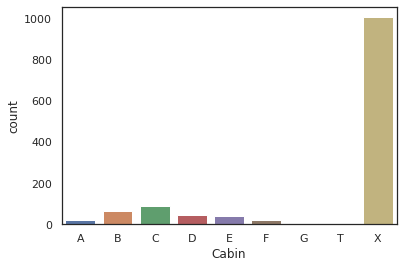

In [65]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


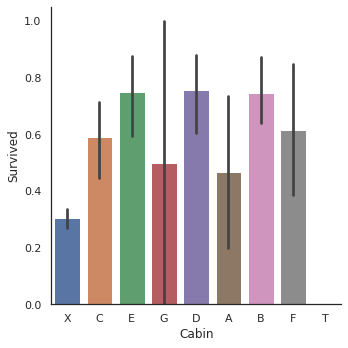

In [66]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar")

일단 X라고 채워두고 데이터의 분포를 봄 

그랫더니 일단 선실 정보가 있기만 하면 살아 남을 확률이 굉장히 높아 보임 

선실이 X면 다죽었는데 선실이 있으면 그중에서도 

E D B의 경우에는 0.8이나 살아 남음 

In [0]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

In [68]:
dataset["Ticket"].describe()

count        1299
unique        929
top       CA 2144
freq            8
Name: Ticket, dtype: object

In [69]:
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) 
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [0]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [71]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Family,Single,SFamily,MFamily,LFamily,Em_C,Em_Q,Em_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,T_A,T_A4,T_A5,T_AQ3,T_AQ4,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_LP,T_PC,T_PP,T_PPP,T_SC,T_SCA3,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,22.0,2.110213,0,1,3,0,1,0.0,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38.0,4.280593,0,2,1,1,1,1.0,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,2.188856,0,3,3,1,0,1.0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,35.0,3.990834,0,4,1,1,1,1.0,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35.0,2.202765,0,5,3,0,0,0.0,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

#모델링

In [73]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
train["Survived"] = train["Survived"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
train_y = train["Survived"]
train_x = train.drop(labels = ["Survived"],axis = 1)

SVC

Decision Tree

AdaBoost

Random Forest

Extra Trees

Gradient Boosting

Multiple layer perceprton

KNN

Logistic regression

Linear Discriminant Analysis

유명한 분류기를 모아 놓고 교차검증을 통해서 평균치를 뽑아 보고 그중에 성능이 좋은 애들을 골라서 깊이 있게 튜닝

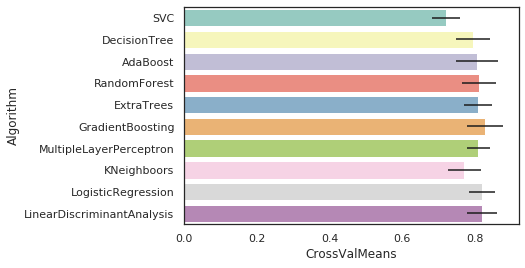

In [76]:
random_state = 2

kfold = StratifiedKFold(n_splits=10)


classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_x, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})

Adaboost는 약한 분류기를 반복적으로 적용하면서 강한 분류기로 비팅하는 방법으로 제대로된 검출에 실패 했다고 치더라도 

오류값에 맞춰서 지속적으로 검증하면서 잘 분류하지 못한 데이터들에 가중치를 두고 그 부분을 복합 검정 하면서 정확도를 높이는 방식이다. 

따라서 이전 분류기가 오분류한 샘플에 집중 하면서 adaptive 하게 바꾸는 과정을 통해 잘 못 분류되는 데이터를 줄이는 방식

In [77]:
#adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=5)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(train_x,train_y)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   12.6s finished


In [78]:
gsadaDTC.best_score_

0.817326353421859

RandomForestClassifier 클래스가 사용하는 결정 트리는 DecisionTreeClassifier

이에 반해 ExtraTreesClassifier가 사용하는 결정 트리는 ExtraTreeClassifier  
 
ExtraTreesClassifier의 매개변수는 RandomForestClassifier와 동일

랜덤 포레스트는 부스트랩 샘플과 랜덤한 후보 특성들을 사용해 여러개의 결정 트리decision tree를 앙상블
 
그래서 훈련 데이터에 과대적합을 막아주고 모델의 일반화 성능이 항상 단일 트리보다 높음

랜덤 포레스트 모델의 변종으로 익스트림 랜덤 트리extremely randomized trees 혹은 엑스트라 트리ExtraTrees라 부르는 모델
 
엑스트라 트리는 포레스트 트리의 각 후보 특성을 무작위로 분할하는 식으로 무작위성을 증가

엑스트라 트리의 베이스 트리인 ExtraTreeClassifier는 DecisionTreeClassifier를 상속한 것이며 

splitter=’best’가 아니고 splitter=’random’인 것과 max_features=’auto’인 것을 제외하고는 동일

In [79]:
#extra tree

ExtC = ExtraTreesClassifier()


ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(train_x,train_y)

ExtC_best = gsExtC.best_estimator_


gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


0.8206716036772216

In [80]:
RFC = RandomForestClassifier()



rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(train_x,train_y)

RFC_best = gsRFC.best_estimator_


gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   46.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.4min finished


0.8297369765066394

In [81]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(train_x,train_y)

GBC_best = gsGBC.best_estimator_


gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   55.5s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.5min finished


0.8274514811031665

In [82]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(train_x,train_y)

SVMC_best = gsSVMC.best_estimator_


gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.3min finished


0.8342696629213483

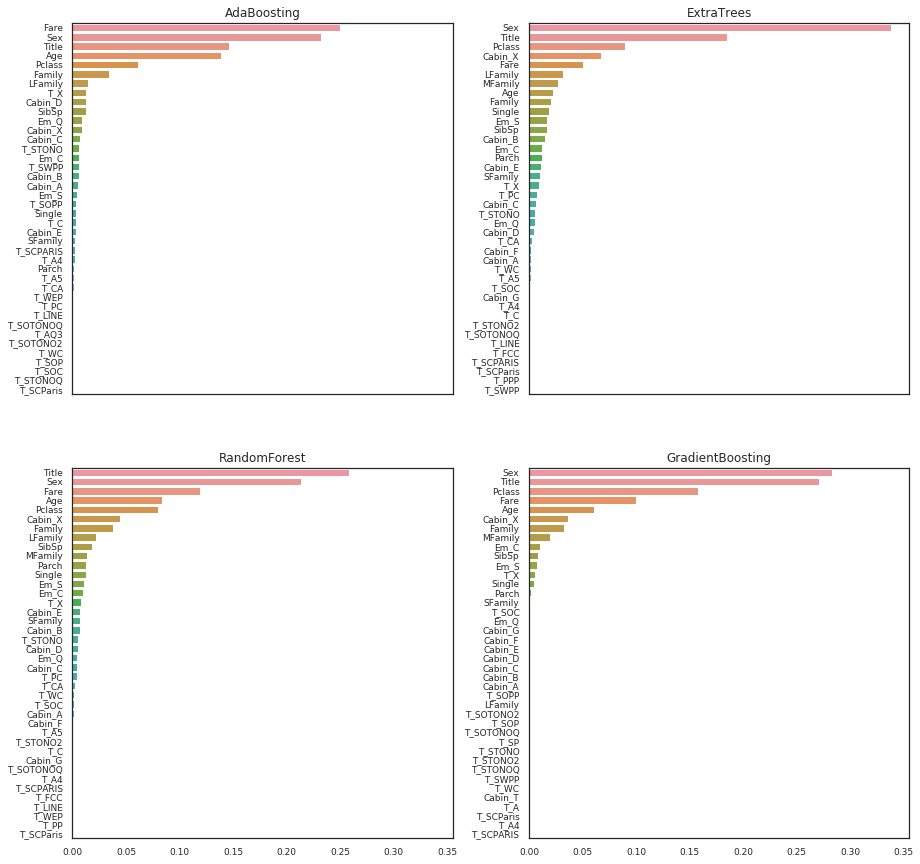

In [83]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0

for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=train_x.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.tick_params(labelsize=9)
        g.set_title(name)
        nclassifier += 1

###xgboost를 통한 앙상블 학습

배깅,부스팅,보팅 방법

앙상블 배깅은 랜덤포레스트 gradient boosting의 경우에는 문제점이 있음 
느리고, 과적합 

gbm보다 빠르고 과적합을 방지하는 규제가 포함되어있고 
classification and regression tree 기반이고 
조기종료 제공하고
앙상블 부스팅의 특징인 가중치 부여를 경사하강법으로 함 

결정트리의 개수 
트리의 깊이 
샘플링 비율
학습률
규제 를 포함 


In [98]:
import xgboost as xgb
'''
parameters = {
    'n_estimators':[280,320],
    'max_depth':[4,5,6,7,8,9,10,11,12],
    'gamma':[1,2,3],
    'max_delta_step':[0,1,2],
    'min_child_weight':[1,2,3], 
    'colsample_bytree':[0.55,0.65],
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[1,0.9,0.8],
    'base_score':[0.5]
}

grid = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5)
grid.fit(train_x,train_y)
print(grid.best_score_)

xg_boost = grid.best_estimator_
xg_boost'''

"\nparameters = {\n    'n_estimators':[280,320],\n    'max_depth':[4,5,6,7,8,9,10,11,12],\n    'gamma':[1,2,3],\n    #'max_delta_step':[0,1,2],\n    'min_child_weight':[1,2,3], \n    #'colsample_bytree':[0.55,0.65],\n    'learning_rate':[0.1,0.2,0.3],\n    'subsample':[1,0.9,0.8],\n    'base_score':[0.5]\n}\n\ngrid = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5)\ngrid.fit(train_x,train_y)\nprint(grid.best_score_)\n\nxg_boost = grid.best_estimator_\nxg_boost"

이거 돌리고 하루 죙일 걸림 

In [105]:
xg_boost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

xg_boost.fit(train_x,train_y)
Y_pred = xg_boost.predict(test)
print(xg_boost.score(train_x,train_y))

scores = cross_val_score(xg_boost, train_x,train_y, cv=kfold, scoring='accuracy')
print(scores)
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))


0.8706015891032917
[0.79775281 0.80681818 0.71590909 0.88636364 0.88636364 0.85227273
 0.80681818 0.79545455 0.88636364 0.82954545]
Kfold on XGBClassifier: 0.8264 (+/- 0.0512)


확실하게 파라미터 보정을 하니까 타율이 올라감

#이제 여기서 feature importance 분석해서 필요한 애들 기준으로 잘라보자

In [102]:
feature_importance = list(zip(train_x.columns.values, xg_boost.feature_importances_))
feature_importance.sort(key=lambda x:x[1])
feature_importance

[('Single', 0.0),
 ('SFamily', 0.0),
 ('Em_Q', 0.0),
 ('Cabin_A', 0.0),
 ('Cabin_B', 0.0),
 ('Cabin_F', 0.0),
 ('Cabin_G', 0.0),
 ('Cabin_T', 0.0),
 ('T_A', 0.0),
 ('T_A4', 0.0),
 ('T_A5', 0.0),
 ('T_AQ3', 0.0),
 ('T_AQ4', 0.0),
 ('T_AS', 0.0),
 ('T_C', 0.0),
 ('T_CA', 0.0),
 ('T_CASOTON', 0.0),
 ('T_FC', 0.0),
 ('T_FCC', 0.0),
 ('T_Fa', 0.0),
 ('T_LINE', 0.0),
 ('T_LP', 0.0),
 ('T_PC', 0.0),
 ('T_PP', 0.0),
 ('T_PPP', 0.0),
 ('T_SC', 0.0),
 ('T_SCA3', 0.0),
 ('T_SCA4', 0.0),
 ('T_SCAH', 0.0),
 ('T_SCOW', 0.0),
 ('T_SCPARIS', 0.0),
 ('T_SCParis', 0.0),
 ('T_SOC', 0.0),
 ('T_SOP', 0.0),
 ('T_SOPP', 0.0),
 ('T_SOTONO2', 0.0),
 ('T_SOTONOQ', 0.0),
 ('T_SP', 0.0),
 ('T_STONO2', 0.0),
 ('T_STONOQ', 0.0),
 ('T_SWPP', 0.0),
 ('T_WC', 0.0),
 ('T_WEP', 0.0),
 ('Parch', 0.012392891),
 ('Cabin_D', 0.012443814),
 ('T_STONO', 0.012485055),
 ('Em_C', 0.015247494),
 ('Em_S', 0.015469352),
 ('T_X', 0.016463347),
 ('MFamily', 0.01719394),
 ('SibSp', 0.020569237),
 ('Cabin_E', 0.021198139),
 ('Cabin_C',

In [266]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best),('xgb',xg_boost)], voting='soft', n_jobs=4)

votingC = votingC.fit(train_x, train_y)

votingC.score(test,test_y)

0.8923444976076556

voting을 통해서 4개 분류기를 돌려 보고

In [0]:
test_Survived = pd.Series(Y_pred, name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("xgboost.csv",index=False)

In [0]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("voting.csv",index=False)

In [110]:
!ls

gender_submission.csv  sample_data  train.csv	xgboost.csv
kaggle.json	       test.csv     voting.csv


In [0]:
test_y = pd.read_csv('gender_submission.csv')

In [112]:
test_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
test_y = test_y['Survived']

In [0]:
y=np.array(test_y)


In [117]:
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
x=results['Survived']
x=np.array(x)

In [269]:
cnt=0 
for i in range(len(y)):
  if y[i]==x[i]:
    cnt+=1
  
print('전체 : ',len(y))
print('맞춘수 : ',cnt)
print('비율 : ',cnt/len(y))

전체 :  418
맞춘수 :  371
비율 :  0.8875598086124402


In [120]:
!ls

gender_submission.csv  sample_data  train.csv	xgboost.csv
kaggle.json	       test.csv     voting.csv


In [0]:
files.download('xgboost.csv')

In [276]:
from sklearn.decomposition import PCA

levels = [2,4,6,8,10,12]
for x in levels:
    pca = PCA(n_components=x)
    fit = pca.fit(train_x)
    fits= pca.fit_transform(train_x)
    fits_t = pca.fit_transform(test)
    print(("{} Components \nExplained Variance: {}\n").format(x, fit.explained_variance_ratio_))
    print(fit.components_)

xg_boost.fit(fits,train_y)

2 Components 
Explained Variance: [0.95550899 0.02217179]

[[ 9.98697033e-01  2.67395765e-02 -4.53736376e-03 -3.39748567e-02
   1.65423425e-04 -7.12608065e-03  1.32415603e-02 -1.16634444e-02
  -6.24459935e-04  5.37740382e-03 -3.88374866e-03 -8.69195225e-04
   5.36456540e-03 -1.52500132e-03 -3.83956408e-03  1.35917647e-03
   2.79861457e-03  6.17213205e-03  2.06094820e-03  1.13630060e-03
  -6.53389710e-04 -4.04986587e-04  0.00000000e+00 -1.24687956e-02
  -6.36135511e-05 -4.61415883e-04 -1.39741481e-04 -1.77346023e-04
  -6.34072594e-05 -0.00000000e+00 -2.75693689e-04 -1.93660609e-03
  -0.00000000e+00  1.03057699e-04 -1.37481441e-04 -0.00000000e+00
  -0.00000000e+00 -6.34479044e-05  6.72751106e-03 -4.04986587e-04
  -0.00000000e+00 -2.01955017e-05  8.51277125e-06 -1.06084328e-04
   2.86749243e-04 -0.00000000e+00 -3.11202737e-04 -4.04440059e-04
  -3.37571792e-04 -0.00000000e+00 -6.77417113e-05 -1.34527589e-04
  -8.53909340e-04 -0.00000000e+00 -6.99904128e-05 -3.53629449e-05
   3.61055018e-05

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65, gamma=2,
              learning_rate=0.3, max_delta_step=1, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=280, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

PCA 분석을 통해 차원의 개수를 줄임

In [278]:
Y_pred = xg_boost.predict(fits_t)
print(xg_boost.score(fits,train_y))

scores = cross_val_score(xg_boost, fits,train_y, cv=kfold, scoring='accuracy')
print(scores)
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

0.9330306469920545
[0.79775281 0.86363636 0.78409091 0.82954545 0.86363636 0.81818182
 0.85227273 0.77272727 0.81818182 0.81818182]
Kfold on XGBClassifier: 0.8218 (+/- 0.0299)


#차원을 개수를 줄인것 만으로도 놀라운 성능의 향상

In [0]:
test_Survived = pd.Series(Y_pred, name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("xgboost_pca.csv",index=False)

In [280]:
!ls

bagging.csv	       kaggle.json  Stacking.csv  train.csv   xgboost.csv
gender_submission.csv  sample_data  test.csv	  voting.csv  xgboost_pca.csv


In [0]:
files.download('xgboost_pca.csv')

In [174]:
!pip install catboost

     |████████████████████████████████| 64.0MB 62kB/s 


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn import feature_selection
import xgboost as xgb # XGBOOST
from xgboost.sklearn import XGBClassifier # XGBOOST
import hyperopt #CatBoost
from catboost import Pool, CatBoostClassifier #CatBoost
import lightgbm as lgb # Light GBM
import statsmodels.api as sm 
from sklearn.model_selection import StratifiedShuffleSplit

import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV


n_splits = 2 
n_iter = 70 
scoring = 'accuracy' 
rstate = 27 
testset_size = 0.35

n_tree_range = st.randint(100, 800)
param_grid ={'n_estimators': n_tree_range}

cv = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=rstate)

tree = DecisionTreeClassifier()
grid = RandomizedSearchCV(BaggingClassifier(tree),
                    param_grid, cv=cv, scoring=scoring,
                    verbose=1,n_iter=n_iter, random_state=rstate)

grid.fit(train_x, train_y)

Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.6min finished


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=2, random_state=27, test_size=0.2,
            train_size=None),
                   error_score=nan,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                     class_weight=None,
                                                                                     criterion='gini',
                                                                                     max_depth=None,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
     

줄인걸 기반으로 결정트리 기반 배깅 앙상블 

In [180]:
grid.score(test,test_y)

0.8205741626794258

In [0]:
Y_pred = grid.predict(test)

In [0]:
test_Survived = pd.Series(Y_pred, name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("bagging.csv",index=False)

In [0]:
files.download('bagging.csv')

In [235]:
!ls

bagging.csv	       kaggle.json  test.csv   voting.csv
gender_submission.csv  sample_data  train.csv  xgboost.csv


In [236]:
print(fit)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


줄어든걸 기반으로 아까 만들었던 몇가지 분류기를 섞어서 stacking  하는 형태로 분류기를 만들자

In [0]:
estimators = [
...     ('Svmc', gsSVMC),
...     ('xgb', xg_boost),('rfc',gsRFC),('bagging',grid),('extra',gsExtC),('ada',gsadaDTC)]

In [0]:
from sklearn.ensemble import StackingClassifier

In [0]:
clf = StackingClassifier(
...     estimators=estimators, final_estimator=LogisticRegression()
... )

In [260]:
clf.fit(train_x,train_y).score(test, test_y)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   47.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.3min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   47.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.6min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   12.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.8s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   48.0s finished


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   29.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   47.7s finished


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   29.9s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   50.8s finished


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   30.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   51.3s finished


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   52.6s finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   43.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.2min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.3min finished


Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.2min finished


Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.1min finished


Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.2min finished


Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.1min finished


Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  3.2min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   42.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   42.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   42.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   42.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.1min finished


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   11.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 208 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   10.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   11.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   11.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   11.4s finished


0.8875598086124402

In [0]:
test_Survived = pd.Series(clf.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("Stacking.csv",index=False)

결과가 상당히 괜찮음

In [262]:
!ls

bagging.csv	       kaggle.json  Stacking.csv  train.csv   xgboost.csv
gender_submission.csv  sample_data  test.csv	  voting.csv


In [0]:
files.download('Stacking.csv')

In [0]:
clf.fit(fits,train_y).score(fits_t, test_y)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   54.7s finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  5.9min finished


Fitting 2 folds for each of 70 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  6.5min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.4min finished


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 816 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   13.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   31.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   29.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   33.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   36.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   37.0s finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   58.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.9min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.7min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   55.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.7min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.9min finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   57.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.7min
